# Pandas and Analysis Titanic

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load your data into a Pandas DataFrame

## The most common options :

- read_csv
- read_excel

In [2]:
data = pd.read_excel('Dataset/titanic.xls')

In [3]:
data.shape
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


* In Pandas, the describe() method is used to generate descriptive statistics of a DataFrame or Series, providing information like mean, standard deviation, minimum, maximum, and quartiles. 

In [5]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## 2. Clean up your dataset with drop(), dropna() and fillna()

In [6]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [7]:
data = data.dropna(axis=0)
data.shape

(1046, 4)

<Axes: >

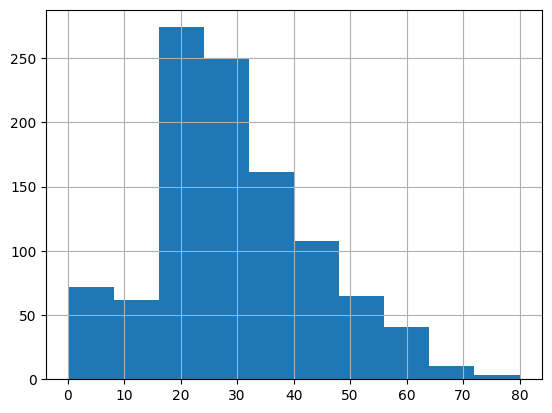

In [8]:
data['age'].hist()

## 3. Groupby() et value_counts()

**groupby()
The groupby() function is used to group data based on one or more columns in a Pandas DataFrame. After grouping, you can perform aggregate functions or apply transformations to each group separately**.

In [9]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [10]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

- The  valu__count() :  function is used to count the occurrences of unique values in a Pandas Series. It's commonly used to understand the distribution of categorical dat..

In [11]:
data['pclass'].value_counts()

pclass
3    501
1    284
2    261
Name: count, dtype: int64

**minor passengers**

In [12]:
data[data['age'] < 18]['pclass'].value_counts()

pclass
3    106
2     33
1     15
Name: count, dtype: int64

# Pandas and time series 
**Bitcion**

## 1. Working with time series

* **index_col='Date'** :
This parameter specifies which column in the CSV file should be used as the index for the DataFrame. If you have a column named 'Date' containing date information, setting index_col='Date' will make that column the index of the DataFrame.
* **parse_dates=True** : This parameter is used to parse the index or specific columns as datetime objects. When set to True, Pandas will attempt to infer and parse datetime information from the specified index column.

In [14]:
bitcoin = pd.read_csv('BTC.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


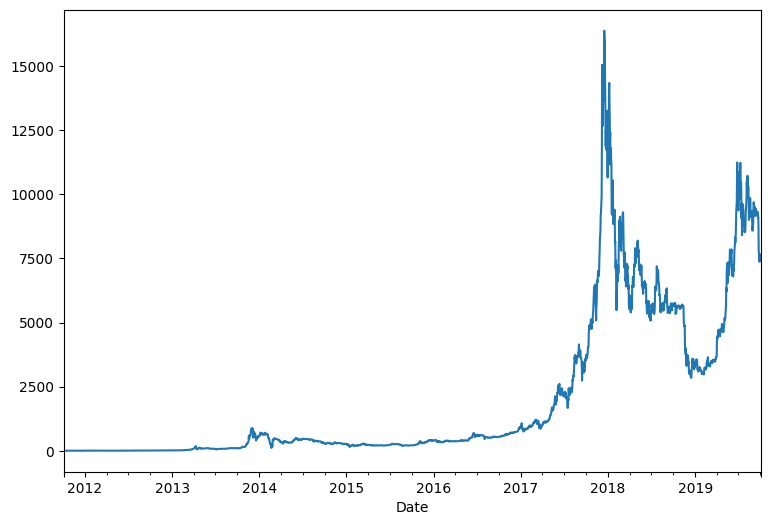

In [15]:
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

In [17]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

**loc** : method in Pandas is used for label-based indexing, allowing you to select data based on labels (rows and columns)

<Axes: xlabel='Date'>

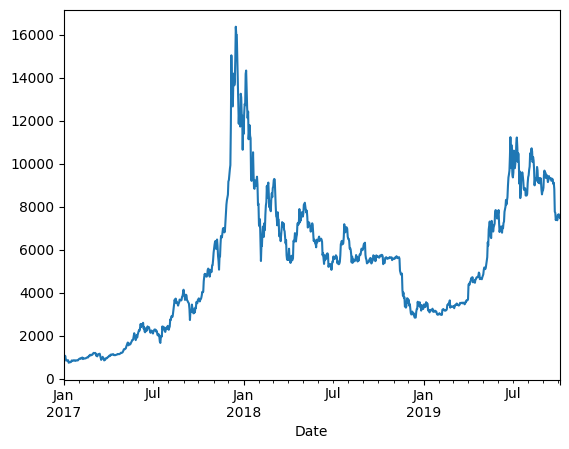

In [24]:
bitcoin.loc['2017':'2019','Close'].plot()

**resample('')** method in Pandas is used to resample time-series data. It provides a flexible way to change the frequency of your time series data, aggregating or transforming it in the process. This method is particularly useful when you have time-indexed data and want to convert it to a different frequency (e.g., from daily to monthly).
* and the aggregation function (e.g., mean(), sum(), max(), etc.) based on your specific requirements. The resample() method is a powerful tool for handling time series data and gaining insights into trends and patterns.

In [79]:
bitc_resample=bitcoin.loc['2019', 'Close'].resample('W').mean()
bitc_resample

Date
2019-01-06     3413.619995
2019-01-13     3308.722830
2019-01-20     3193.085728
2019-01-27     3139.568534
2019-02-03     3010.647182
2019-02-10     3093.135742
2019-02-17     3196.895717
2019-02-24     3472.014334
2019-03-03     3361.397147
2019-03-10     3427.681432
2019-03-17     3460.784319
2019-03-24     3531.442906
2019-03-31     3584.785749
2019-04-07     4359.692906
2019-04-14     4590.292829
2019-04-21     4660.011510
2019-04-28     4758.075753
2019-05-05     4914.774344
2019-05-12     5612.528599
2019-05-19     6992.334263
2019-05-26     7195.460031
2019-06-02     7734.090053
2019-06-09     6983.092773
2019-06-16     7477.018555
2019-06-23     8714.534180
2019-06-30    10267.635603
2019-07-07     9935.128627
2019-07-14    10392.299805
2019-07-21     9229.286970
2019-07-28     8812.220145
2019-08-04     9239.845703
2019-08-11    10440.625697
2019-08-18     9434.581473
2019-08-25     9337.704241
2019-09-01     8894.015764
2019-09-08     9518.921596
2019-09-15     9309.785

In [80]:
start = '2019-01'
end = '2019-10'


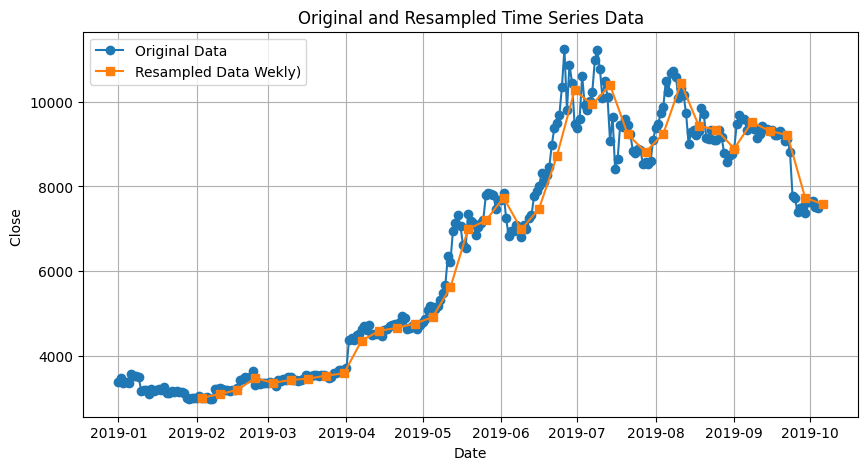

In [81]:
# Plotting the original and resampled data
plt.figure(figsize=(10, 5))

# Original data
plt.plot(bitcoin.loc[start:end,'Close'], label='Original Data', marker='o')

# Resampled data
plt.plot(bitc_resample['2019-01-31':'2019-10-31'], label='Resampled Data Wekly)', marker='s')

# Customize the plot
plt.title('Original and Resampled Time Series Data')
plt.xlabel('Date')
plt.ylabel('Close ')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

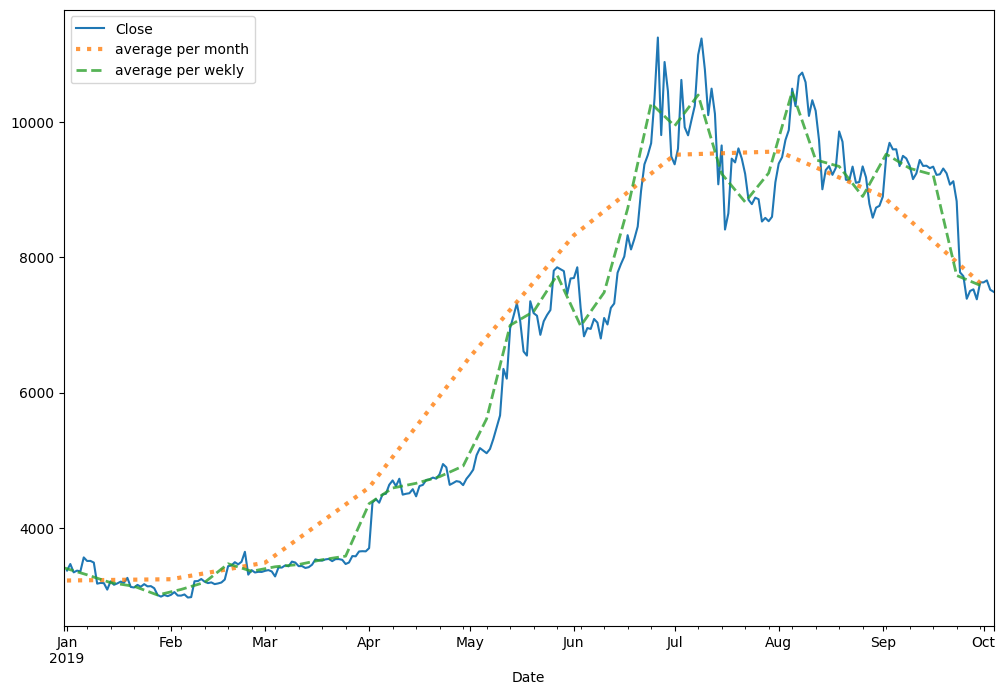

In [87]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='average per month', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='average per wekly', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

**std()** method in Pandas is used to calculate the standard deviation of a set of values. When applied to a Pandas DataFrame or Series, it returns the standard deviation along a specified axis.

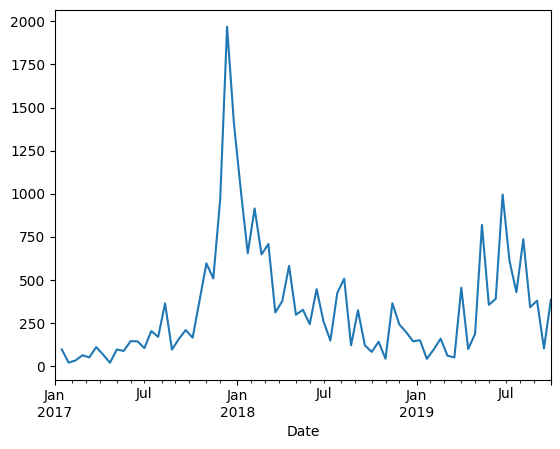

In [85]:
bitcoin.loc['2017':, 'Close'].resample('2W').std().plot()
plt.show()

## 3: Aggregate

* **agg()**  method in Pandas is used for aggregation operations on a Pandas DataFrame. It allows you to apply multiple aggregation functions to different columns or the same function to multiple columns simultaneously. The agg() function is versatile and provides flexibility in specifying the aggregation logic

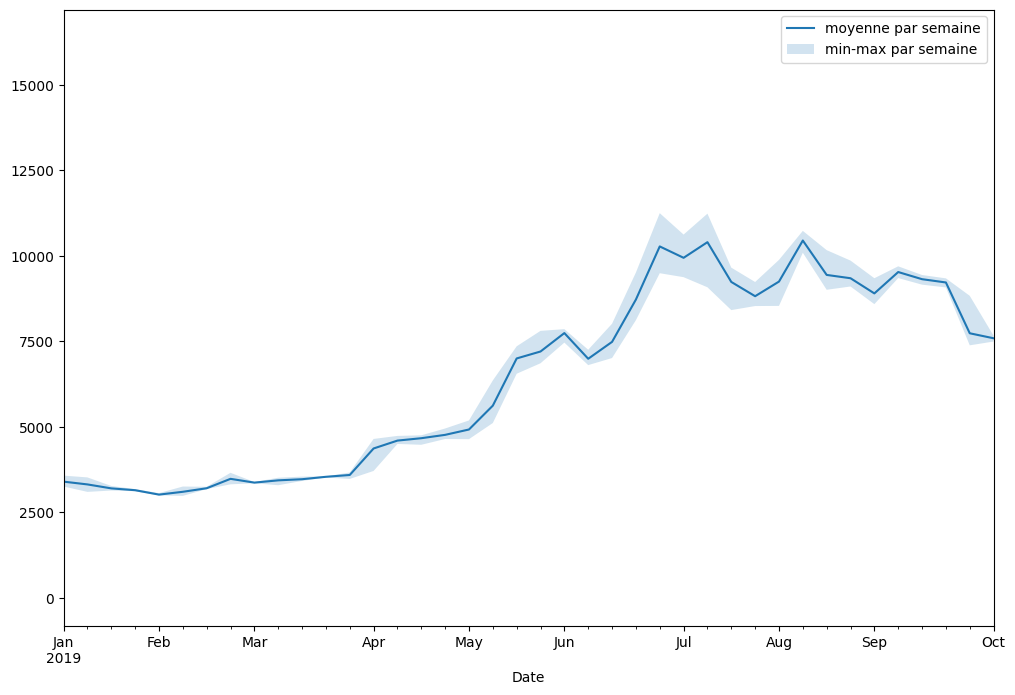

In [88]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max']) 

plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

<Axes: xlabel='Date'>

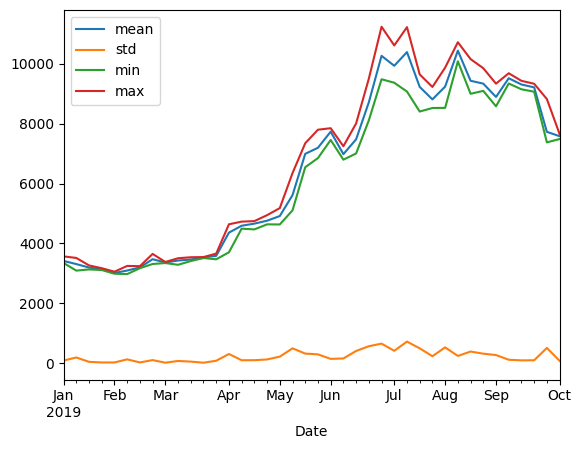

In [91]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

## 4. Moving Average and EWM 
# EWM : exponential weighted moving average

* Moving Average 
  **Rolling()** : method in Pandas is used for rolling window calculations on time-series or sequential data. It provides an easy way to perform operations like rolling mean, rolling sum, or other custom operations within a specified window of data points.
* EWM
  **ewm()** : method in Pandas is used for exponential moving window calculations on time-series or sequential data. It provides a way to calculate exponentially weighted statistics, such as the exponential moving average (EMA) or exponential moving standard deviation

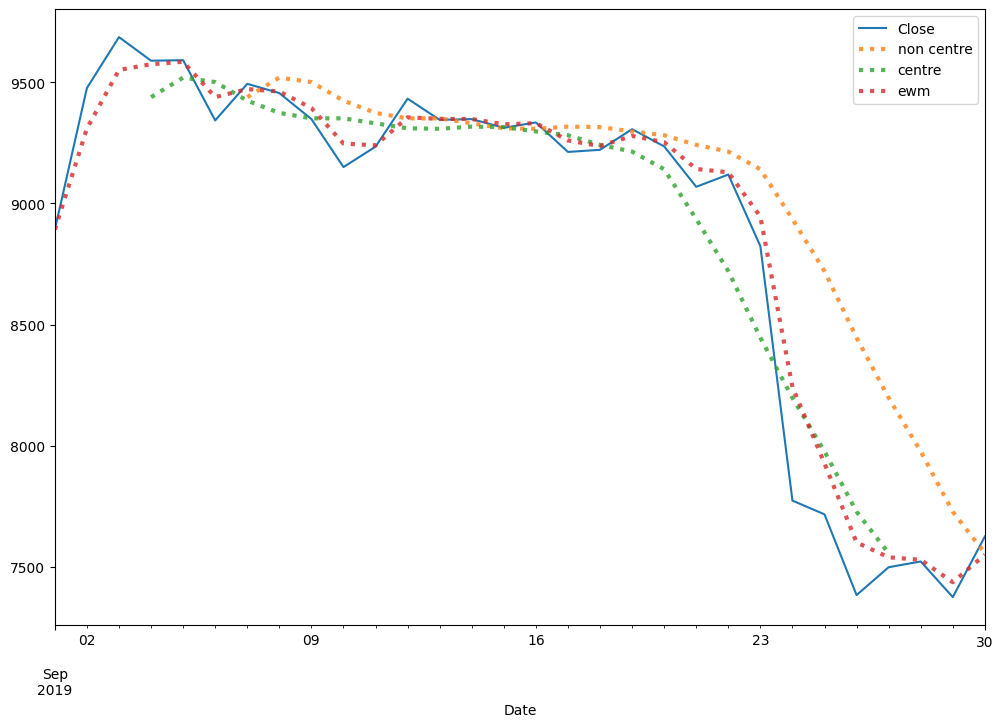

In [92]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

 **Alpha** parameter between 0 and 1. 

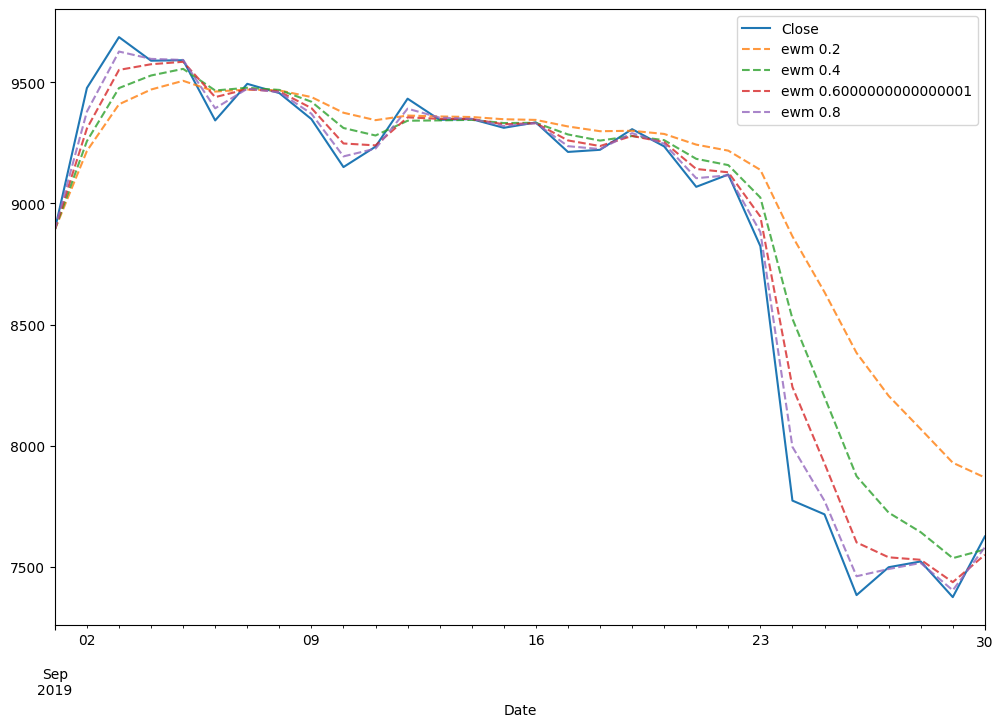

In [93]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

## 5. Comparison of 2 time series

In [94]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

**merge()** method in Pandas, it is indeed a crucial function used for combining data from different DataFrames based on common columns or indices.
You can also perform different types of joins **(inner, outer, left, right)**, handle overlapping column names, and merge on multiple columns by specifying the **how**, left_on, and right_on parameters,

 **on** parameter in the **merge()** method of Pandas specifies the column or columns on which to merge the DataFrames. It is the common key or keys based on which the merging operation is performed. The on parameter takes one or more column names (or a list of column names) that exist in both DataFrames.

In [95]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

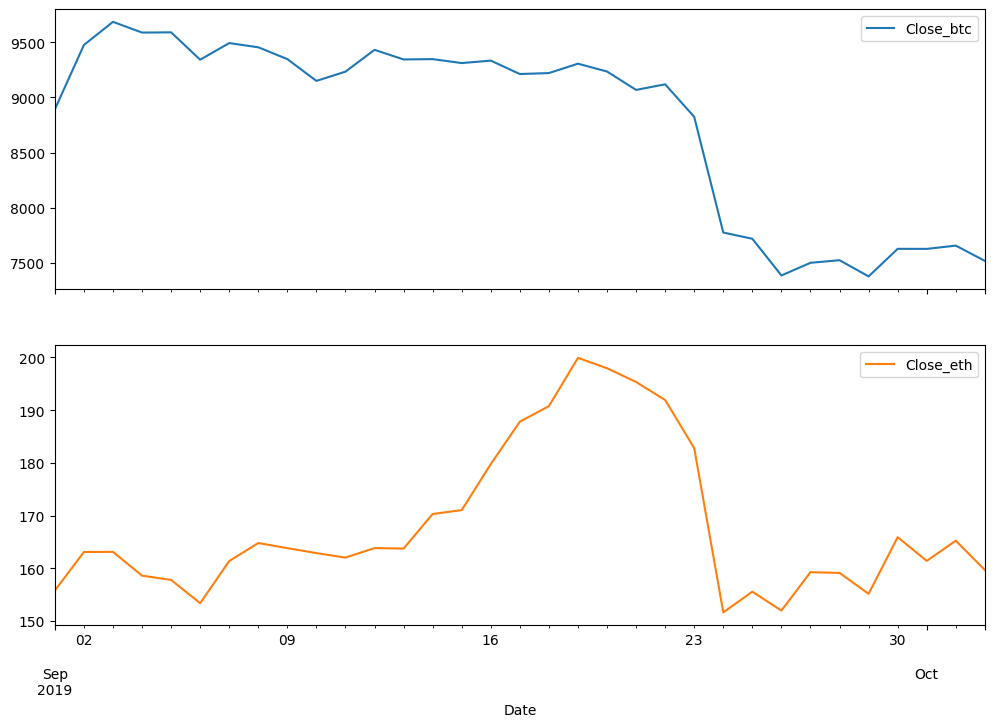

In [97]:
btc_eth[['Close_btc', 'Close_eth']]['2019-09':].plot(subplots=True, figsize=(12, 8))